In [8]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 
from matplotlib import pyplot as plt # for plotting

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [9]:
#Different clasifier will be test in order to check which is the one which works best for clasifying a song in
#between big hit or not.

In [11]:
df = pd.read_csv('data/popularity.csv')
df.head()

,Unnamed: 0,track_name,artist_name,sum_streams,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_duration_ms,popularity,target
0,1,Shape of You,Ed Sheeran,2007865025,0.825,0.6520,-3.1830,0.0802,0.58100,0.000000,0.0931,0.9310,95.9770,233712.0,1,1
1,2,God's Plan,Drake,1193354417,0.756,0.4505,-9.2105,0.1095,0.03270,0.000083,0.5675,0.3515,77.1685,198973.0,2,1
2,3,Havana,Camila Cabello,1081243413,0.765,0.5230,-4.3330,0.0300,0.18400,0.000036,0.1320,0.3940,104.9880,217306.0,3,1
3,4,Despacito - Remix,Luis Fonsi,1016932253,0.649,0.7980,-4.3460,0.1780,0.22600,0.000000,0.0711,0.8570,177.8990,230413.0,4,1
4,5,New Rules,Dua Lipa,993805591,0.762,0.7000,-6.0210,0.0694,0.00261,0.000016,0.1530,0.6080,116.0730,209320.0,5,1


In [12]:
#taking feature between 0 and 1

features = ["avg_acousticness", "avg_danceability", "avg_energy", "avg_instrumentalness","avg_liveness", 
          "avg_speechiness", "avg_valence"]

In [13]:
X = df[features]
y = df['target']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=242)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13004, 7), (1445, 7), (13004,), (1445,))

In [16]:
#Linear Regression

LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))
print(classification_report(y_test,LR_Model.predict(X_test)))



Accuracy: 0.7480968858131488
             precision    recall  f1-score   support

          0       0.75      1.00      0.86      1081
          1       0.00      0.00      0.00       364

avg / total       0.56      0.75      0.64      1445



/Users/FelixCamacho/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
#Decision Tree

DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy)+"%")
print(classification_report(y_test,DT_Model.predict(X_test)))



Accuracy: 0.6269896193771626%
             precision    recall  f1-score   support

          0       0.75      0.74      0.75      1081
          1       0.27      0.28      0.27       364

avg / total       0.63      0.63      0.63      1445



In [18]:
#Support Vector Machine

LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train, y_train)
LSVC_Predict = LSVC_Model.predict(X_test)
LSVC_Accuracy = accuracy_score(y_test, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy)+"%")
print(classification_report(y_test,LSVC_Model.predict(X_test)))

Accuracy: 0.6304498269896194%
             precision    recall  f1-score   support

          0       0.76      0.75      0.75      1081
          1       0.28      0.29      0.28       364

avg / total       0.64      0.63      0.63      1445



In [19]:
#Random Forest

RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)

print("Accuracy: " + str(RFC_Accuracy)+"%")
print(classification_report(y_test,LSVC_Model.predict(X_test)))

Accuracy: 0.7273356401384083%
             precision    recall  f1-score   support

          0       0.76      0.75      0.75      1081
          1       0.28      0.29      0.28       364

avg / total       0.64      0.63      0.63      1445



In [20]:
#KNN

KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)

print("Accuracy: " + str(KNN_Accuracy)+"%")
print(classification_report(y_test,KNN_Model.predict(X_test)))

Accuracy: 0.7072664359861591%
             precision    recall  f1-score   support

          0       0.76      0.90      0.82      1081
          1       0.31      0.14      0.19       364

avg / total       0.64      0.71      0.66      1445



In [21]:
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_test)
XGB_Accuracy = accuracy_score(y_test, XGB_Predict)

print("Accuracy: " + str(XGB_Accuracy)+"%")
print(classification_report(y_test,XGB_Model.predict(X_test)))

Accuracy: 0.7474048442906575%
             precision    recall  f1-score   support

          0       0.75      1.00      0.86      1081
          1       0.33      0.00      0.01       364

avg / total       0.64      0.75      0.64      1445



/Users/FelixCamacho/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/FelixCamacho/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
XGB_Model.predict_proba(X_test) #va mirando la prob d que el punto sea 0 o sea 1

array([[0.7020238 , 0.2979762 ],
       [0.68167925, 0.31832072],
       [0.6599397 , 0.3400603 ],
       ...,
       [0.63144785, 0.36855215],
       [0.6884204 , 0.3115796 ],
       [0.63144785, 0.36855215]], dtype=float32)

In [23]:
print(XGB_Model.feature_importances_)



[0.06784713 0.33619094 0.0893013  0.1600821  0.18053946 0.07847929
 0.0875598 ]


In [24]:
colnames = ["acous","dance","engy","instr","live","speec","val"]


In [25]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC',
                                                      'XGBClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy,
                                                         XGB_Accuracy]})

In [26]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
0,LogisticRegression,0.748097
5,XGBClassifier,0.747405
1,RandomForestClassifier,0.727336
2,KNeighborsClassifier,0.707266
4,LinearSVC,0.630450
3,DecisionTreeClassifier,0.626990


In [27]:
#Logistic Regresion and XGBoost provided the best predictions on the training model

In [28]:
# feature importance
print(XGB_Model.feature_importances_)



[0.06784713 0.33619094 0.0893013  0.1600821  0.18053946 0.07847929
 0.0875598 ]


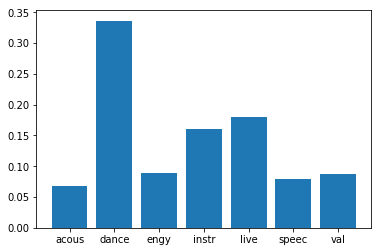

In [29]:
# plot
plt.bar(colnames, XGB_Model.feature_importances_)
plt.show()

In [30]:
#Danceability, Liveness and Instrumentalness are the more influence 